<a href="https://colab.research.google.com/github/fer3her/vision-con-IA/blob/main/Reto2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto “Clasificación no supervisada”**


*  Sobre una de las imágenes filtrada y también sobre la misma no filtrada, implementar un agrupamiento (clustering) no supervisado, que agrupe en diferente cantidad de clases.
* No es recomendable generar más de 4 clases.
* Puede usar K-Means u otro que considere.
*La imagen agrupada debe quedar nuevamente en escala de grises, de acuerdo a rescalización de 0 a 255 de los valores de las clases.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
## PASO 1: Librerías necesarias
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


def aplicar_kmeans(img, k=3, resize_factor=0.2):
    # Reducir tamaño de la imagen (resamplear)
    height, width = img.shape
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    img_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Aplanar la imagen reducida
    img_2d = img_resized.reshape((-1, 1)).astype(np.float32) / 255.0

    # Aplicar KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(img_2d)

    # Crear imagen de salida a 0-255
    etiquetas_img = etiquetas.reshape(img_resized.shape)
    etiquetas_img_norm = (255 * (etiquetas_img / (k - 1))).astype(np.uint8)

    return etiquetas_img_norm

método del codo (Elbow Method), que te ayuda a elegir el número óptimo de clusters (k) para aplicar KMeans.

In [ ]:
# Método del codo para elegir k
def metodo_del_codo(img, resize_factor=0.1):
    # Reducir imagen
    height, width = img.shape
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    img_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Aplanar y normalizar
    img_2d = img_resized.reshape((-1, 1)).astype(np.float32) / 255.0

    # Calcular distorsión para diferentes k
    K = range(1, 6)
    distortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(img_2d)
        distortions.append(kmeans.inertia_)

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo para Determinar k')
    plt.grid()
    plt.show()


Método del codo - Imagen reescalada:


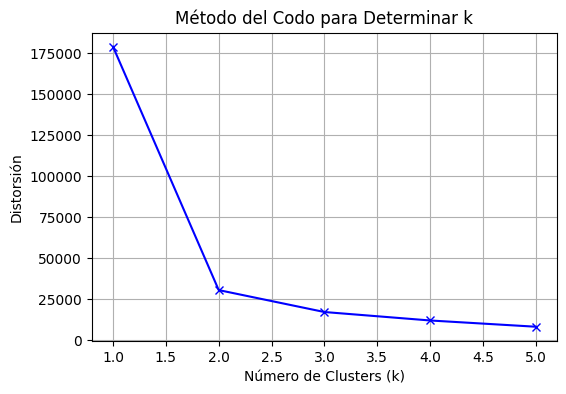

Método del codo - Imagen filtrada:


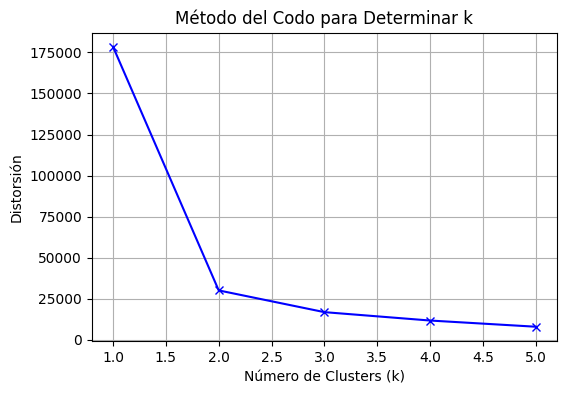

In [ ]:
# Selección de una imagen
basepath = r'C:\Users\Usuario\Downloads\Imagenes reto 3 parcial -20250404T162556Z-001'
nombre_imagen = 'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002'
img_path_reescalada = os.path.join(basepath, nombre_imagen + '_scaled.tiff')
img_path_filtrada = os.path.join(basepath, nombre_imagen + '_filtrada.tiff')

# Cargar imágenes
img_reescalada = cv2.imread(img_path_reescalada, cv2.IMREAD_UNCHANGED)
img_filtrada = cv2.imread(img_path_filtrada, cv2.IMREAD_UNCHANGED)


# Visualizar método del codo
print("Método del codo - Imagen reescalada:")
metodo_del_codo(img_reescalada, resize_factor=0.1)

print("Método del codo - Imagen filtrada:")
metodo_del_codo(img_filtrada, resize_factor=0.1)




Según la gráfica, el “codo” se encuentra en k = 2, ya que a partir de ese punto la disminución en la distorsión empieza a ser mucho más lenta y menos significativa.
Por lo tanto, el número óptimo de clusters para este conjunto de datos es 2, ya que es donde se logra un buen balance entre complejidad del modelo y capacidad de agrupación.

**Aplicación de K-Means con Diferentes Valores de k sobre Imágenes Reescaladas y Filtradas**

In [ ]:
img_kmeans_2 = aplicar_kmeans(img_reescalada, k=2, resize_factor=0.1)
img_kmeans_2_filtrada = aplicar_kmeans(img_filtrada, k=2, resize_factor=0.1)

img_kmeans_3 = aplicar_kmeans(img_reescalada, k=3, resize_factor=0.1)
img_kmeans_3_filtrada = aplicar_kmeans(img_filtrada, k=3, resize_factor=0.1)

img_kmeans_4 = aplicar_kmeans(img_reescalada, k=4, resize_factor=0.1)
img_kmeans_4_filtrada = aplicar_kmeans(img_filtrada, k=4, resize_factor=0.1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_segmentacion(img_kmeans, k, titulo):
    alto, ancho = img_kmeans.shape
    X_coords, Y_coords = np.meshgrid(np.arange(ancho), np.arange(alto))
    X = np.stack((X_coords.ravel(), Y_coords.ravel()), axis=1)
    y_kmeans = img_kmeans.ravel()

    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='s', s=10, edgecolor='none')
    plt.title(f'{titulo} (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def visualizar_kmeans_en_imagen(imagen, nombre="Imagen", resize_factor=0.1, k_range=range(1, 6)):
    # Redimensionar imagen
    height, width = imagen.shape[:2]
    new_size = (int(width * resize_factor), int(height * resize_factor))
    resized_img = cv2.resize(imagen, new_size, interpolation=cv2.INTER_AREA)

    # Detectar si la imagen es en escala de grises o multibanda
    if len(resized_img.shape) == 2:
        # Imagen en escala de grises: convertir a 2D (N,1)
        flat_img = resized_img.reshape(-1, 1)
        feature1 = flat_img[:, 0]
        feature2 = flat_img[:, 0]  # Para graficar algo
    else:
        # Imagen con múltiples bandas o RGB
        num_bands = resized_img.shape[2]
        flat_img = resized_img.reshape(-1, num_bands)
        feature1 = flat_img[:, 0]
        feature2 = flat_img[:, 1] if num_bands > 1 else flat_img[:, 0]

    # Aplicar KMeans para distintos k
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
        y_kmeans = kmeans.fit_predict(flat_img)

        plt.figure(figsize=(6, 5))
        plt.scatter(feature1, feature2, c=y_kmeans, cmap='viridis', s=10, edgecolor='k')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1 if flat_img.shape[1] > 1 else 0],
                    s=300, c='red', label='Centroides', edgecolor='k')

        plt.title(f'{nombre} - K-means Clustering (k={k})')
        plt.xlabel('Canal 1')
        plt.ylabel('Canal 2')
        plt.legend()
        plt.grid(True)
        plt.show()



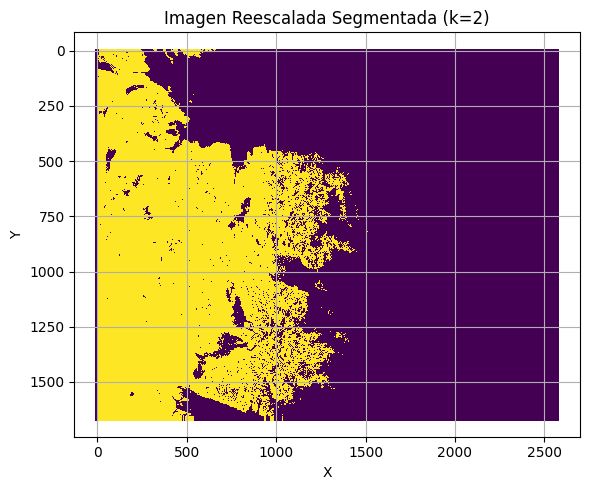

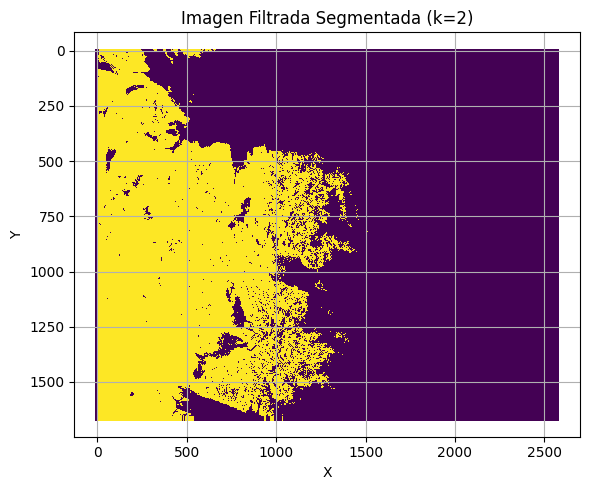

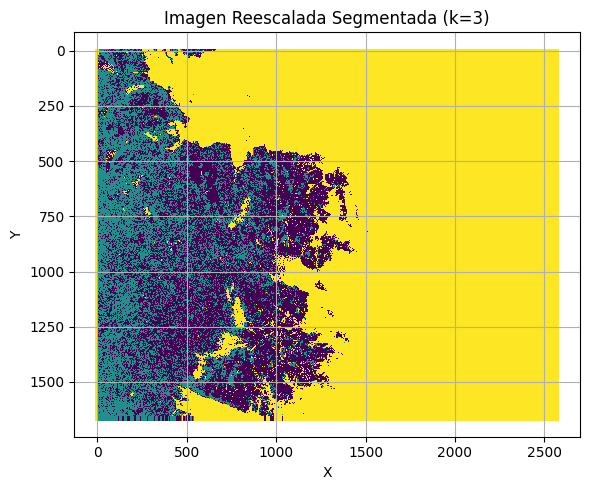

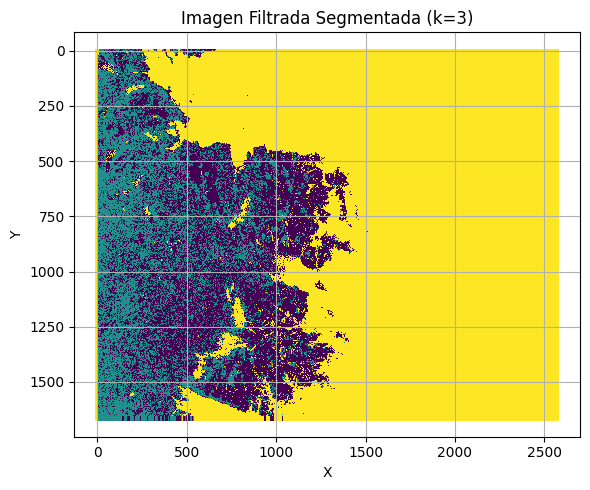

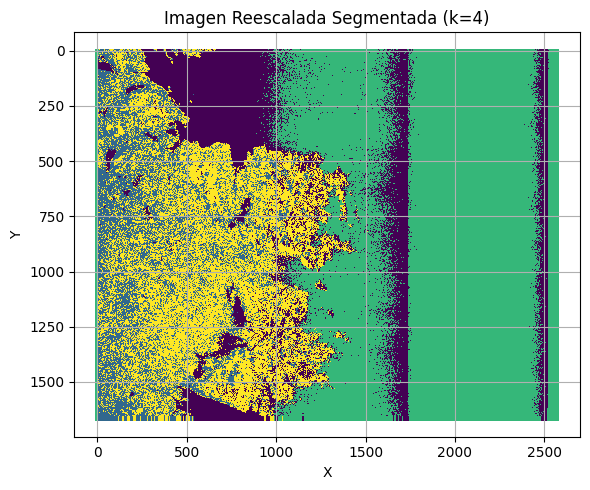

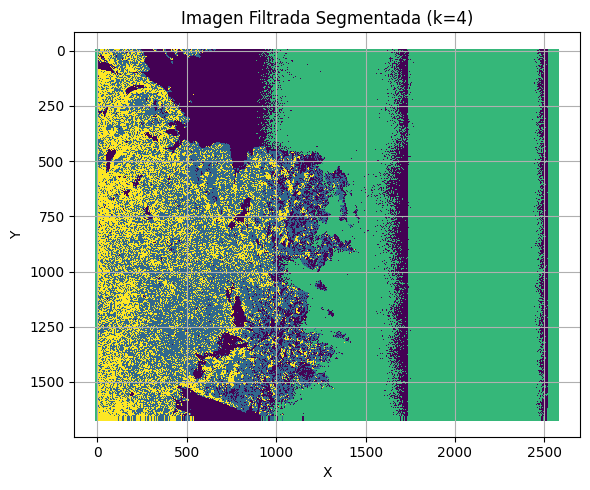

In [ ]:
# k = 2
visualizar_segmentacion(img_kmeans_2, k=2, titulo='Imagen Reescalada Segmentada')
visualizar_segmentacion(img_kmeans_2_filtrada, k=2, titulo='Imagen Filtrada Segmentada')

# k = 3
visualizar_segmentacion(img_kmeans_3, k=3, titulo='Imagen Reescalada Segmentada')
visualizar_segmentacion(img_kmeans_3_filtrada, k=3, titulo='Imagen Filtrada Segmentada')

# k = 4
visualizar_segmentacion(img_kmeans_4, k=4, titulo='Imagen Reescalada Segmentada')
visualizar_segmentacion(img_kmeans_4_filtrada, k=4, titulo='Imagen Filtrada Segmentada')



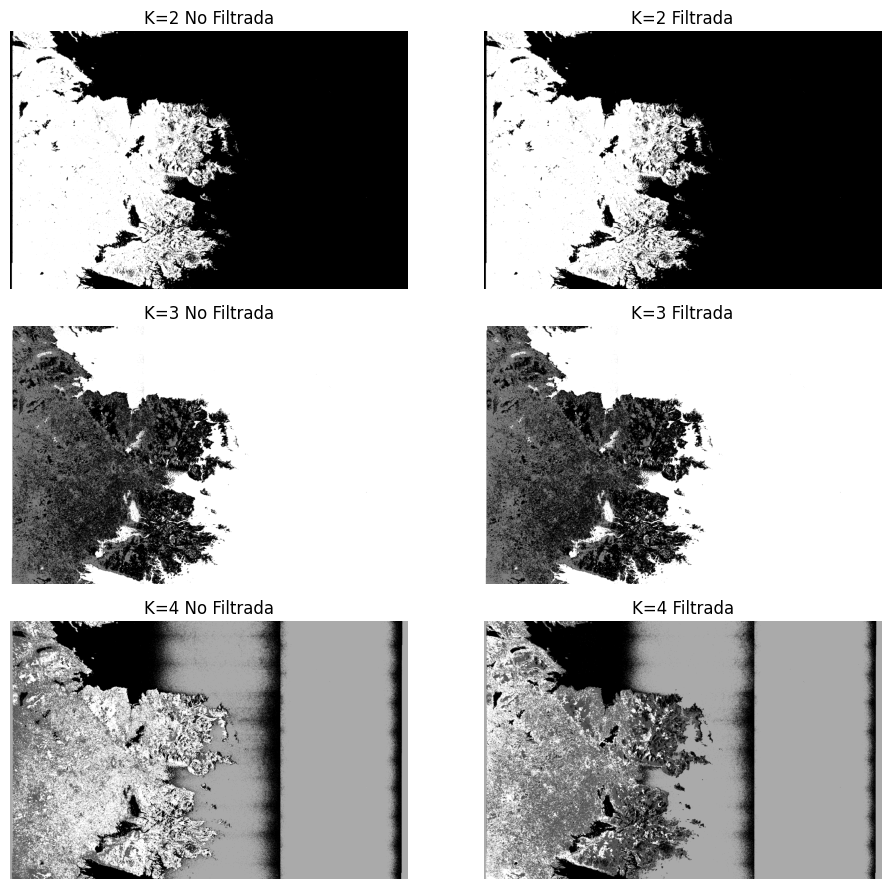

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9))

# Fila 1 - K=2
axs[0, 0].imshow(img_kmeans_2, cmap='gray')
axs[0, 0].set_title('K=2 No Filtrada')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_kmeans_2_filtrada, cmap='gray')
axs[0, 1].set_title('K=2 Filtrada')
axs[0, 1].axis('off')

# Fila 2 - K=3
axs[1, 0].imshow(img_kmeans_3, cmap='gray')
axs[1, 0].set_title('K=3 No Filtrada')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_kmeans_3_filtrada, cmap='gray')
axs[1, 1].set_title('K=3 Filtrada')
axs[1, 1].axis('off')

# Fila 3 - K=4
axs[2, 0].imshow(img_kmeans_4, cmap='gray')
axs[2, 0].set_title('K=4 No Filtrada')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_kmeans_4_filtrada, cmap='gray')
axs[2, 1].set_title('K=4 Filtrada')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


La aplicación del algoritmo K-means para diferentes valores de k muestra que la segmentación varía significativamente según el preprocesamiento de la imagen. Las imágenes filtradas presentan resultados más coherentes y definidos en comparación con las no filtradas, lo que evidencia la importancia del filtrado previo para mejorar la calidad de la segmentación.

Se observa que el preprocesamiento mediante filtrado mejora notablemente la segmentación en todos los valores de k. Para k = 2, la imagen filtrada permite distinguir con mayor claridad las regiones principales. Con k = 3, la segmentación mejora en precisión, diferenciando mejor los cuerpos de agua, vegetación y áreas urbanas. Finalmente, con k = 4,  aparecen artefactos en ambas versiones.


##  Análisis de Clases y Conclusiones

### ¿Es posible identificar qué representa cada clase?

Sí, tras aplicar K-means con diferentes valores de *k* (2, 3 y 4), se observó que las clases generadas agrupan regiones con diferentes características espectrales. Si bien no se asignan etiquetas automáticas, es posible hacer inferencias visuales basadas en la textura, intensidad del radar y la comparación con imágenes ópticas:

- **Clase brillante o blanca (en muchas segmentaciones con k=2 o k=3)**: corresponde principalmente al agua
- **Clases intermedias (grises claros)**: podrían asociarse a **vegetación baja o media**, como pastizales o cultivos.
- **Clases más oscuras o texturizadas**: pueden representar **vegetación alta** (bosques o zonas densas).


### ¿Cómo se ve el agua, la vegetación y los edificios?

- **Agua**: aparece como regiones homogéneas, sin textura, generalmente muy oscuras o blancas en la máscara binaria.
- **Vegetación**: presenta una textura granular, con diferentes intensidades según su densidad.


### ¿Qué más se observa?

- La **imagen no filtrada** tiene mayor ruido, lo que genera clases confusas o bordes poco definidos.
- La **imagen filtrada**, al reducir la variabilidad espuria, permite una segmentación más limpia y coherente espacialmente.
- Se observa que a medida que **aumenta k**, las clases se dividen mejor, pero también puede aparecer sobresegmentación en zonas homogéneas.

### Comparación: Imagen filtrada vs. No filtrada

| Característica                    | Imagen No Filtrada              | Imagen Filtrada                   |
|----------------------------------|----------------------------------|----------------------------------|
| Ruido presente                   | Alto                             | Bajo                             |
| Claridad de clases               | Media, con bordes difusos        | Alta, clases más definidas       |
| Precisión en la detección de agua| Menor (áreas sobreestimadas)     | Mayor (detección más precisa)    |
| Segmentación general             | Irregular en zonas homogéneas    | Consistente y detallada          |

###  Conclusión General

La aplicación del algoritmo de agrupamiento K-means sobre imágenes radar Sentinel-1 permitió diferenciar de forma no supervisada zonas con distinta cobertura. Se concluye que el filtrado previo es esencial para mejorar la precisión de la clasificación. La clase correspondiente al agua fue identificada con mayor certeza en la imagen filtrada, lo cual es clave para aplicaciones como monitoreo de cuerpos hídricos, análisis de inundaciones o gestión ambiental.




# **Reto “Clasificación de agua/no agua”**
-A partir del agrupamiento realizado en el paso anterior, elimine todas las clases y mantenga sólo la clase “agua” (agua en blanco, el resto negro)
Puede tomar una sola polarización si lo desea, la que más le suministre información.
-Nuevamente, use la imagen filtrada y la no filtrada, para comparar resultados.
-Medir porcentaje de agua en las imágenes.
-Obtener conclusiones y análisis.


In [ ]:
def extraer_agua_y_calcular_porcentaje(imagen, nombre="Imagen", resize_factor=0.1):
    # 1. Reducir tamaño de la imagen para que el procesamiento sea más rápido
    height, width = imagen.shape[:2]
    new_size = (int(width * resize_factor), int(height * resize_factor))
    resized_img = cv2.resize(imagen, new_size, interpolation=cv2.INTER_AREA)

    # 2. Convertir a escala de grises si es una imagen RGB o multibanda
    if len(resized_img.shape) == 3:
        img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = resized_img

    # 3. Aplanar la imagen (de 2D a 1D) para aplicar KMeans clustering
    flat_img = img_gray.reshape((-1, 1))

    # 4. Aplicar KMeans con k=2 para separar en dos clases (agua y no-agua)
    k = 2
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    labels = kmeans.fit_predict(flat_img)

    # 5. Reconstruir imagen a partir de etiquetas obtenidas por KMeans
    labels_img = labels.reshape(img_gray.shape)

    # 6. Determinar cuál clase representa el agua:
    # Se asume que el agua tiene menor intensidad en escala de grises (más oscura)
    mean_vals = [img_gray[labels_img == i].mean() for i in range(k)]
    clase_agua = np.argmin(mean_vals)  # Clase con menor valor promedio

    # 7. Crear una máscara binaria:
    # Agua (clase detectada) = blanco (255)
    # Todo lo demás (no-agua) = negro (0)
    mask_agua = np.zeros_like(img_gray, dtype=np.uint8)
    mask_agua[labels_img == clase_agua] = 255

    # 8. Calcular el porcentaje de área que corresponde al agua
    porcentaje_agua = np.sum(mask_agua == 255) / mask_agua.size * 100

    # 9. Mostrar la máscara resultante
    plt.imshow(mask_agua, cmap='gray')
    plt.title(f'Máscara de Agua - {nombre}')
    plt.axis('off')
    plt.show()

    # Mostrar el resultado en consola
    print(f"{nombre}: {porcentaje_agua:.2f}% de agua")

    # 10. Retornar el porcentaje y la máscara por si se quieren usar después
    return porcentaje_agua, mask_agua


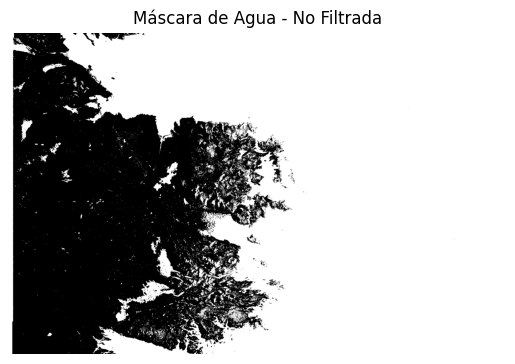

No Filtrada: 65.85% de agua


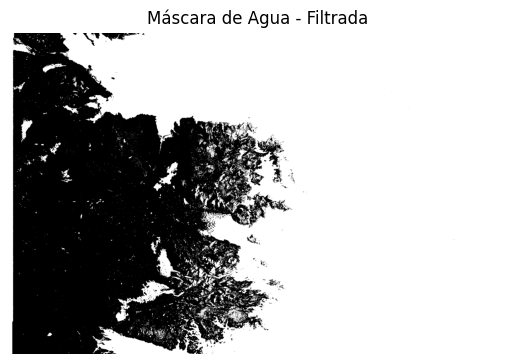

Filtrada: 65.90% de agua


In [ ]:
porcentaje_agua_no_filtrada, mask_no_filtrada = extraer_agua_y_calcular_porcentaje(img_reescalada, nombre="No Filtrada", resize_factor=0.1)

porcentaje_agua_filtrada, mask_filtrada = extraer_agua_y_calcular_porcentaje(img_filtrada, nombre="Filtrada", resize_factor=0.1)



###  Conclusión y Análisis del Reto “Clasificación de agua/no agua”

A partir del proceso de agrupamiento mediante K-means, se generaron máscaras binarias conservando únicamente la clase correspondiente al agua (representada en blanco). Se utilizaron imágenes en polarización dual y se compararon los resultados entre las versiones filtrada y no filtrada.

La **imagen no filtrada** mostró un **65.85 % de cobertura de agua**, mientras que la imagen filtrada presentó una distribución más limpia y precisa de las zonas hídricas, reduciendo el ruido de fondo y las falsas detecciones mostró un **65.90 % de cobertura de agua**

Se evidencia que **el preprocesamiento mediante filtrado** tiene un impacto significativo en la calidad de la clasificación. El ruido presente en la imagen no filtrada tiende a generar sobreestimaciones del área cubierta por agua, mientras que la imagen filtrada logra una segmentación más fiel a la realidad.


